### Breakdown of the code
    1. Importing libraries
    2. Create some data for classification
    3. Write the kNN workflow
    4. Finally, run knn on the data and observe results

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# First we need to create some data. For that, we'll be using a proability distribution
# We'll try to define some parameters for the distribution, but before that
# let's discuss what these parameters do for a distribution
mean_01 = np.asarray([0., 2.])
sigma_01 = np.asarray([[1.0, 0.0], [0.0, 1.0]])

mean_02 = np.asarray([4., 0.])
sigma_02 = np.asarray([[1.0, 0.0], [0.0, 1.0]])


data_01 = np.random.multivariate_normal(mean_01, sigma_01, 500)
data_02 = np.random.multivariate_normal(mean_02, sigma_02, 500)
print(data_01.shape, data_02.shape)

(500, 2) (500, 2)


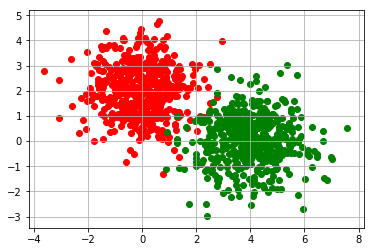

In [4]:
plt.figure(0)
#plt.xlim(-2, 10)
#plt.ylim(-2, 10)
plt.grid('on')
plt.scatter(data_01[:, 0], data_01[:, 1], color='red')
plt.scatter(data_02[:, 0], data_02[:, 1], color='green')
plt.show()

In [5]:
labels = np.zeros((1000, 1))
labels[500:, :] = 1.0

In [7]:
data = np.concatenate([data_01, data_02], axis=0)
print(data.shape)

(1000, 2)


In [9]:
ind = range(0,1000)
np.random.shuffle(ind)

print(ind[:10])

TypeError: 'range' object does not support item assignment

In [ ]:
data = data[ind]
labels = labels[ind]

In [ ]:
print data.shape, labels.shape

In [ ]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(x, train, targets, k=5):
    m = train.shape[0]
    dist = []
    for ix in range(m):
        # compute distance from each point and store in dist
        dist.append(distance(x, train[ix]))
    dist = np.asarray(dist)
    indx = np.argsort(dist)
    sorted_labels = labels[indx][:k]
    counts = np.unique(sorted_labels, return_counts=True)
    return counts[0][np.argmax(counts[1])]

In [ ]:
x_test = np.asarray([4.0, -2.0])
knn(x_test, data, labels)

In [ ]:
# split the data into training and testing
split = int(data.shape[0] * 0.75)

X_train = data[:split]
X_test = data[split:]

y_train = labels[:split]
y_test = labels[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

In [ ]:
# create a placeholder for storing test predictions
preds = []

# run a loop over every testing example and store the predictions
for tx in range(X_test.shape[0]):
    preds.append(knn(X_test[tx], X_train, y_train))
preds = np.asarray(preds).reshape((250, 1))
print preds.shape

In [ ]:
print 100*(preds == y_test).sum() / float(preds.shape[0])